# Introdução ao Machine Learning

1. O que é?
2. Quando usar e quando não usar
3. O que precisa

conhecemos $f$, conhemos $x$ e queremos
$$
    y = f(x)
$$

e se tivermos a seguinte situação: temos $x$, temos $y$, mas não temos $f$.


Etapas Iniciais:
0. Entendimento do problema: do que se trata, para que ele esta sendo resolvido, já existe alguma solução ...
1. O problema é supervisionado, ou não-supervisionado.
2. Determinar o tipo do problema: regressão, ou se é uma classificação
3. O treino vai ser on-line, ou por batch?
4. A generalização dos modelos vai ser baseado no modelo ou nas instâncias?




In [66]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [42]:
!pip install -U seaborn

     -------------------------------------- 285.1/285.1 KB 2.9 MB/s eta 0:00:00


In [3]:
DATA_DIR = "./data/"

In [5]:
housing = pd.read_csv(os.path.join(DATA_DIR, "housing.csv"))
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [105]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [106]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


Existem 167 casas sem o número de banheiros.

In [107]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [108]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

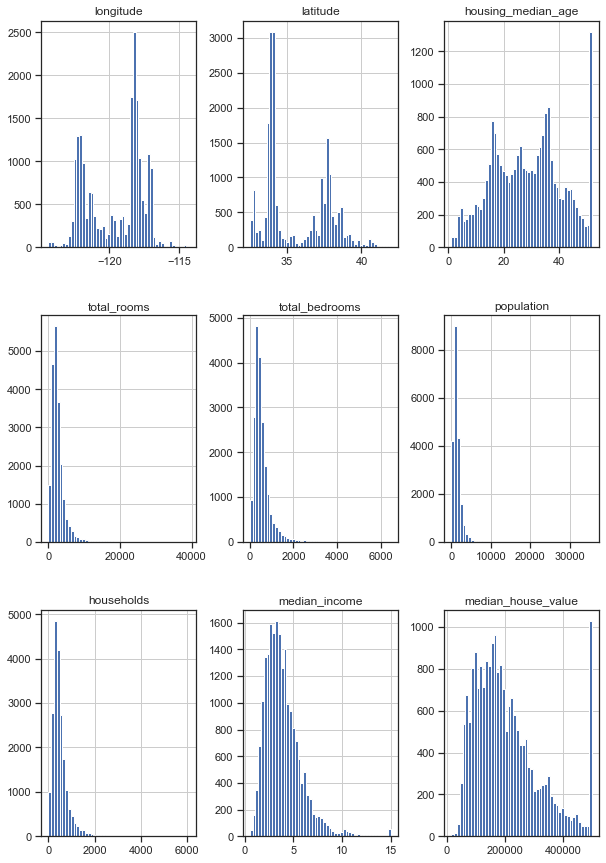

In [109]:
housing.hist(bins=50, figsize=(10, 15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

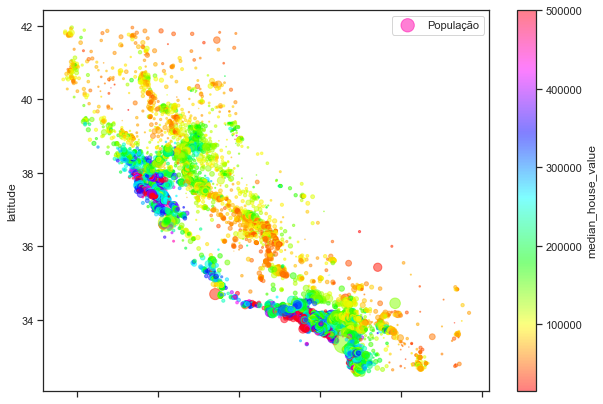

In [110]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
            alpha=0.5, c="median_house_value", cmap=plt.get_cmap("hsv"),
            s=housing["population"]/100, label="População")

# Refazer o gráfico abaixo usando o Plotly, ou com o Folium
# página com os diferentes cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [111]:
housing_cols = housing.columns
housing_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [112]:
attributes = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']
attributes

['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

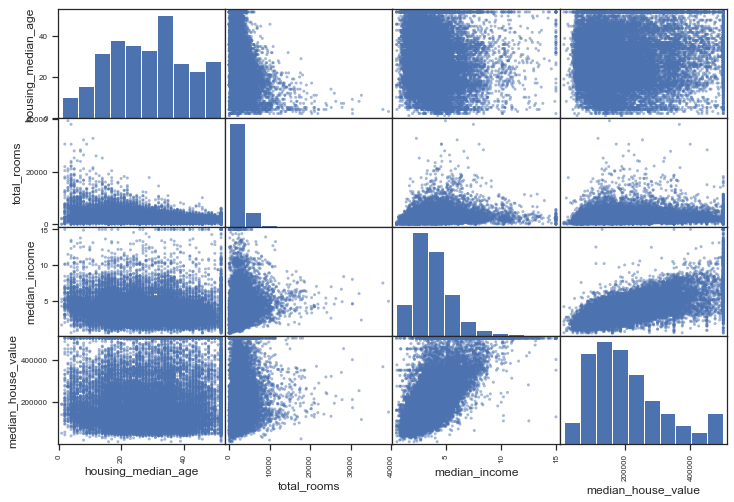

In [113]:
scatter_matrix(housing[attributes], figsize=(12, 8))

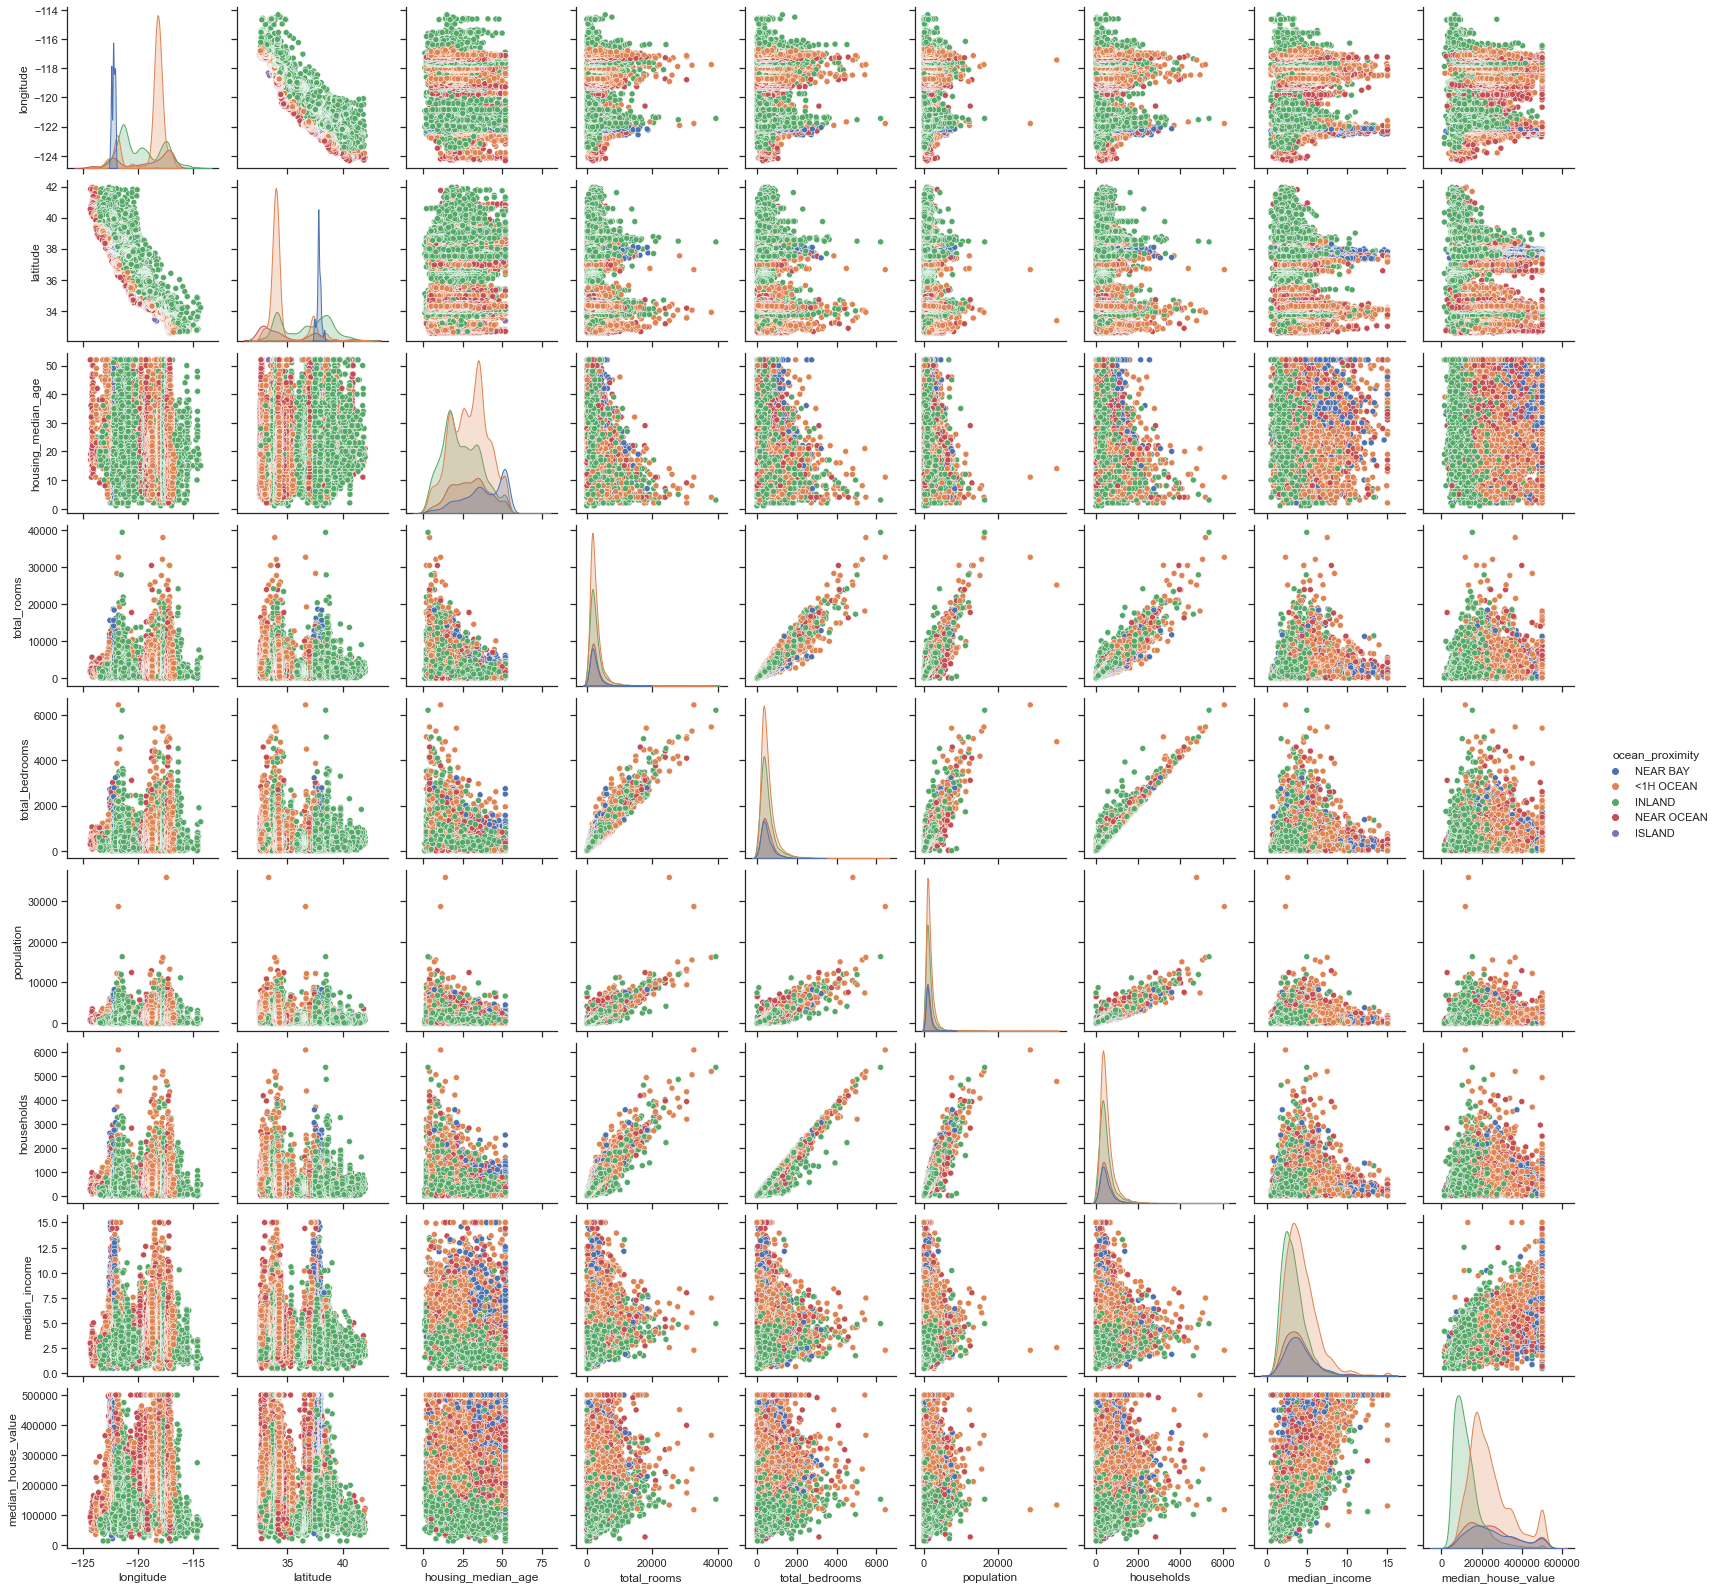

In [114]:
sns.pairplot(housing, hue="ocean_proximity")

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

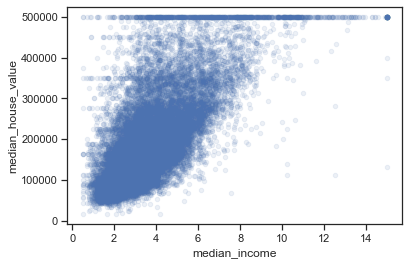

In [115]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

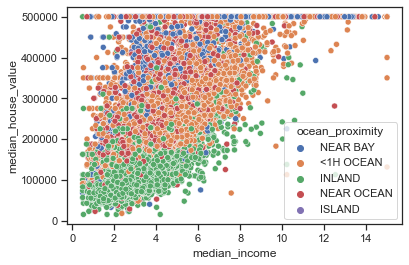

In [116]:
sns.scatterplot(housing,  x="median_income", y="median_house_value", hue="ocean_proximity")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

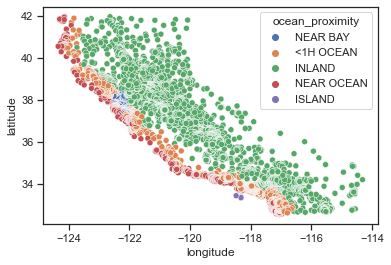

In [117]:
sns.scatterplot(housing, x="longitude", y="latitude", hue="ocean_proximity")

In [118]:
housing["rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing["population_per_households"] = housing["population"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"] 

In [119]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_households,population_per_households,bedrooms_per_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,2.181467,0.172096


In [120]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_households         0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_households   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='bedrooms_per_rooms', ylabel='median_house_value'>

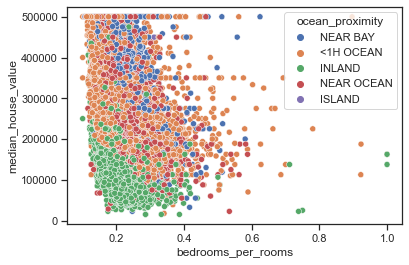

In [121]:
sns.scatterplot(housing,  x="bedrooms_per_rooms", y="median_house_value", hue="ocean_proximity")

In [122]:
housing = housing.drop(["bedrooms_per_rooms", "rooms_per_households", "population_per_households"], axis=1)

In [123]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [124]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

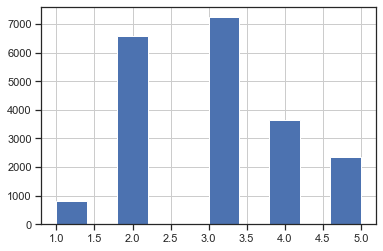

In [125]:
housing["income_cat"].hist()

In [126]:
housing["income_cat"].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [127]:
labels = housing.pop("median_house_value")

In [128]:
labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [140]:
housing = housing.drop(["ocean_proximity"], axis=1)

In [78]:
!pip install -U scikit-learn

     ---------------------------------------- 7.3/7.3 MB 27.5 MB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [161]:
X_treino, X_teste, y_treino, y_teste = train_test_split(housing, labels, test_size=0.2, random_state=42)
X_treino

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,3
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,4


In [133]:
len(X_teste) / housing.shape[0]

0.2

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
linear_model = LinearRegression()

In [164]:
type(linear_model)

sklearn.linear_model._base.LinearRegression

In [165]:
linear_model.fit(X_treino, y_treino)

LinearRegression()

In [166]:
linear_model.score(X_teste, y_teste)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [154]:
some_labels = labels[:5]
some_labels

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [159]:
linear_model.predict(some_data)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.linear_model import Clss